**Task:**
Using Python and Natural Language Processing (NLP), I collected job postings from online platforms such as LinkedIn and Indeed. I then extracted and analyzed skill-related keywords from job descriptions, cluster them by sector, and track their frequency over time using data analysis and visualization techniques. keywords are predefined for the nodes/labels in the cluster

**Goal:**
To provide clear, data-driven insights into which technical and soft skills are increasing or decreasing in demand. This will help students, educators, and professionals make informed career and training decisions aligned with current job market trends.

This tool analyzes job postings data to identify trending skills, track demand over time, and provide data-driven insights for career planning and market analysis.


I will collect job postings from online platforms such as LinkedIn and Indeed. I will then extract and analyze skill-related keywords from job descriptions, cluster them by sector, and track their frequency over time using data analysis and visualization techniques. I will implement it by using python NLP and any library related to NLP such as spaCy, word embeddings and so on.

Dataset contains job postings of 2024 in US cities from LinkedIn and Indeed.

### Algorithmic Complexity
Architecture =  Word2Vec + KMeans clustering

𝑉
V = number of skills

𝐾
K = number of clusters

𝐼
I = number of iterations

Complexity
𝑂
(
𝑉
⋅
𝐾
⋅
𝐷
⋅
𝐼
)
O(V⋅K⋅D⋅I)

Word2vec generates huge amount of dimensions didnt apply dimensionality reduction for the sparse matrix here but the results doesnt make any reasonable difference with this approach

### Word Embeddings from Word2Vec Model

In [5]:
if 'analyzer' in globals() and analyzer is not None and analyzer.word2vec_model is not None:
    print(f"Vocabulary size: {len(analyzer.word2vec_model.wv.key_to_index)}")
    print("\nEmbedding for 'python':")
    try:
        print(analyzer.word2vec_model.wv['python'])
    except KeyError:
        print("'python' not in vocabulary.")

    print("\nEmbedding for 'data':")
    try:
        print(analyzer.word2vec_model.wv['data'])
    except KeyError:
        print("'data' not in vocabulary.")

    print("\nEmbedding for 'manager':")
    try:
        print(analyzer.word2vec_model.wv['manager'])
    except KeyError:
        print("'manager' not in vocabulary.")

    print("\nEmbedding for 'communication':")
    try:
        print(analyzer.word2vec_model.wv['communication'])
    except KeyError:
        print("'communication' not in vocabulary.")

    print("\nSome similar words for 'python':")
    try:
        display(analyzer.word2vec_model.wv.most_similar('python'))
    except KeyError:
        print("'python' not in vocabulary to find similar words.")

else:
    print("Word2Vec model not found or not trained. Please ensure the main analysis has been run.")

Word2Vec model not found or not trained. Please ensure the main analysis has been run.


#1. Source of Dataset
<p> <i> Kaggle </i> </p>
https://www.kaggle.com/datasets/rajatraj0502/linkedin-job-2023/data?select=job_postings.csv

Analyzed **15887** Jobs Posts Description

**Installing Required Libraries**

- Natural Lanauge Tool Kit
- Stopwords
- Wordnet Lemmitizer
- Tagger

In [6]:
# Install required packages
!pip install gensim wordcloud nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

- Trains on job descriptions to understand word relationships

- Finds similar skills (e.g., "python" → "django", "flask")

- Creates semantic understanding of skill relationships

####2. Performed Data Cleaning by using RE and NLTK Libraries then applied tokenization
####Imported TF-IDF (optional) and Word2Vec to convert tokens to vectors and train the vectors on Word2Vec Model
####Imported KMeans Clustering algorithm applied to unlabeled data points  
####
####Ranking the Top skills

####3.  Skills Extraction

Technical Skills Categories:

Programming languages (Python, Java, JavaScript, etc.)

Data Science (ML, TensorFlow, pandas, etc.)

Cloud technologies (AWS, Azure, Docker, Kubernetes)

Databases (SQL, MongoDB, Redis, etc.)

Web development (React, Angular, Node.js, etc.)

Cybersecurity

AI/ML technologies




Soft Skills:

Communication, leadership, teamwork

Problem-solving, critical thinking

Project management, agile methodologies

4. Advanced Analysis Features
Word2Vec Model:

Trains on job descriptions to understand word relationships

Finds similar skills (e.g., "python" → "django", "flask") in the vector space the similar words have some similar/nearest data points , suppose python has 0.7880 value then django can have 0.7895 or flask with 0.7899

Creates semantic understanding of skill relationships

Groups jobs into sectors using ML clustering

Uses either Word2Vec embeddings or TF-IDF

Automatically identifies sector names from common keywords

# Output Deliverables
8 Visualizations (PNG files):

3 bar charts (all skills, technical, soft skills)

1 trend line chart

1 sector heatmap

3 word clouds

Insights Report (Text file) with:

Skill rankings and frequencies

Market sector analysis

Career planning insights

###Business/Use Case Limitations
Domain Specificity
Tech-focused Bias: Skill dictionaries heavily weighted toward tech industry

Limited Industry Coverage: Poor for non-technical roles (healthcare, finance, etc.)

Western Market Bias: Skill names and categories based on Western job markets

In [7]:
import pandas as pd
import numpy as np
import re
from collections import Counter, defaultdict
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# NLP and ML libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Word2Vec library
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

# Word cloud library
from wordcloud import WordCloud

# Set style for better visualizations
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

In [8]:

df = pd.read_csv('/content/job_postings.csv')
df.head(10)


,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
5,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,YEARLY,Full-time,"Albany, GA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
6,967848246,18995316.0,Education Manager,"Company Snapshot Headquartered in North Miami,...",NaN,NaN,NaN,NaN,Full-time,United States,...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
7,1004740969,882349.0,Civil Engineer,We are a growing and successful Structural Eng...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
8,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.0,NaN,50.0,HOURLY,Part-time,"Muskegon, MI",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,PART_TIME,USD,BASE_SALARY
9,1053342128,NaN,Company Owner,HVAC & Refrigeration technicians and helpers n...,NaN,NaN,NaN,NaN,Full-time,"Midland, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN


In [9]:
# Check basic info about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(15))

# Check data types
print(f"\nData types:")
print(df.dtypes)

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")
print(f"Duplicate job IDs: {df['job_id'].duplicated().sum()}")

# Check unique values in key columns
print(f"\nUnique work types: {df['formatted_work_type'].unique()}")
print(f"Unique pay periods: {df['pay_period'].dropna().unique()}")
# Text columns for NLP
text_columns = ['title', 'description', 'skills_desc']

# Check if description column has enough data
print(f"Jobs with description: {df['description'].notnull().sum()}/{len(df)}")

Dataset shape: (15886, 27)

Missing values per column:
skills_desc                   15742
closed_time                   14958
med_salary                    14905
remote_allowed                13546
max_salary                    10365
min_salary                    10365
pay_period                     9384
compensation_type              9384
currency                       9384
applies                        7186
posting_domain                 6842
application_url                6091
formatted_experience_level     4902
views                          2763
company_id                      366
dtype: int64

Data types:
job_id                          int64
company_id                    float64
title                          object
description                    object
max_salary                    float64
med_salary                    float64
min_salary                    float64
pay_period                     object
formatted_work_type            object
location                       object

In [10]:
class JobSkillsAnalyzer:
    """Main class for analyzing job postings and extracting skill trends."""

    def __init__(self, csv_path='job_postings.csv'):
        """Initialize the analyzer with job postings data."""
        self.csv_path = csv_path
        self.df = None
        self.skills_dict = {}
        self.sector_clusters = None
        self.word2vec_model = None
        self.use_word2vec = True

        # Common technical skills keywords
        self.technical_skills = {
            'programming': ['python', 'java', 'javascript', 'c++', 'c#', 'ruby', 'go', 'rust', 'swift', 'kotlin',
                          'php', 'r', 'matlab', 'sql', 'html', 'css', 'typescript', 'scala', 'perl'],
            'data_science': ['machine learning', 'deep learning', 'neural network', 'tensorflow', 'pytorch',
                           'keras', 'scikit-learn', 'pandas', 'numpy', 'data analysis',
                           'statistics', 'regression', 'classification', 'clustering', 'nlp', 'natural language'],
            'cloud': ['aws', 'azure', 'gcp', 'google cloud', 'amazon web services', 'cloud computing',
                     'docker', 'kubernetes', 'terraform', 'ci/cd', 'devops'],
            'databases': ['sql', 'mysql', 'postgresql', 'mongodb', 'redis', 'cassandra', 'oracle',
                         'nosql', 'sql server'],
            'web': ['react', 'angular', 'vue', 'node.js', 'django', 'flask', 'spring', 'express',
                   'rest api', 'graphql', 'microservices'],
            'cybersecurity': ['cybersecurity', 'penetration testing', 'ethical hacking',
                            'network security', 'information security', 'encryption', 'firewall'],
            'ai_ml': ['artificial intelligence', 'machine learning', 'ml', 'neural network',
                     'computer vision', 'nlp', 'reinforcement learning', 'chatbot', 'llm', 'gpt']
        }

        # Soft skills keywords
        self.soft_skills = ['communication', 'leadership', 'teamwork', 'problem solving', 'critical thinking',
                           'collaboration', 'adaptability', 'time management', 'project management',
                           'agile', 'scrum', 'analytical', 'creative', 'interpersonal']

        # Initialize NLP components
        try:
            self.stop_words = set(stopwords.words('english'))
            self.lemmatizer = WordNetLemmatizer()
        except:
            self.stop_words = set()
            self.lemmatizer = None

    def load_data(self, sample_size=None, chunk_size=10000):
        """Load job postings data from CSV file."""
        print(f"Loading data from {self.csv_path}...")

        try:
            if sample_size:
                # Load a sample for faster processing
                self.df = pd.read_csv(self.csv_path, nrows=sample_size, low_memory=False)
                print(f"Loaded {len(self.df)} rows (sample)")
            else:
                # Load full dataset
                self.df = pd.read_csv(self.csv_path, low_memory=False)
                print(f"Loaded {len(self.df)} rows")

            # Clean and preprocess
            self._preprocess_data()
            print("Data preprocessing completed.")
            return True
        except Exception as e:
            print(f"Error loading data: {e}")
            return False

    def _preprocess_data(self):
        # Handle missing 'description' column more robustly
        # Ensure description column exists and is filled with empty strings for NaN values
        if 'description' not in self.df.columns:
            self.df['description'] = ''
            print("Warning: 'description' column not found. Creating empty column.")
        else:
            self.df['description'] = self.df['description'].fillna('')

        # Start with an empty series for combined_text, matching the DataFrame's index
        combined_text_series = pd.Series([''] * len(self.df), index=self.df.index)

        # Append title if available
        if 'title' in self.df.columns:
            combined_text_series = self.df['title'].fillna('')

        # Now append description, ensuring there's a space if title was present
        combined_text_series = combined_text_series.str.cat(self.df['description'], sep=' ', na_rep='')

        # Append skills_desc if available
        if 'skills_desc' in self.df.columns:
            combined_text_series = combined_text_series.str.cat(self.df['skills_desc'].fillna(''), sep=' ', na_rep='')

        # Assign the final combined text series to the DataFrame
        self.df['combined_text'] = combined_text_series.str.strip() # Remove any leading/trailing spaces

        print(f"Created combined_text column. Empty descriptions: {self.df['combined_text'].eq('').sum()}")

    def extract_skills(self, text):
        """Extract skills from job description text."""
        if pd.isna(text) or text == '':
            return []

        text_lower = text.lower()
        found_skills = []

        # Extract technical skills
        for category, skills in self.technical_skills.items():
            for skill in skills:
                # Use word boundaries for better matching
                pattern = r'\b' + re.escape(skill.lower()) + r'\b'
                if re.search(pattern, text_lower):
                    found_skills.append(skill)
                    found_skills.append(category)  # Also add category

        # Extract soft skills
        for skill in self.soft_skills:
            pattern = r'\b' + re.escape(skill.lower()) + r'\b'
            if re.search(pattern, text_lower):
                found_skills.append(skill)

        # Extract capitalized terms (often technologies/tools)
        if self.lemmatizer:
            try:
                tokens = word_tokenize(text)
                tagged = pos_tag(tokens)
                # Extract proper nouns and capitalized words (likely technologies)
                proper_nouns = [word for word, pos in tagged if pos == 'NNP' and len(word) > 2]
                found_skills.extend([pn.lower() for pn in proper_nouns[:10]])  # Limit to avoid noise
            except:
                pass

        return list(set(found_skills))  # Remove duplicates

    def analyze_skills(self):
        """Analyze skills across all job postings."""
        print("Extracting skills from job descriptions...")

        # Extract skills for each job
        self.df['extracted_skills'] = self.df['combined_text'].apply(self.extract_skills)

        # Flatten all skills
        all_skills = []
        for skills_list in self.df['extracted_skills']:
            all_skills.extend(skills_list)

        # Count skill frequencies
        skill_counts = Counter(all_skills)
        self.skills_dict = dict(skill_counts)

        print(f"Found {len(self.skills_dict)} unique skills")
        return self.skills_dict

    def train_word2vec(self, vector_size=100, window=5, min_count=2, workers=4, epochs=10):
        """Train Word2Vec model on job descriptions."""
        if not self.use_word2vec:
            print("Word2Vec not available. Install gensim to use this feature.")
            return None

        if self.df is None or 'combined_text' not in self.df.columns:
            print("Please load data first.")
            return None

        print("Training Word2Vec model on job descriptions...")

        # Prepare sentences (tokenized text)
        sentences = []
        for text in self.df['combined_text'].fillna(''):
            if text:
                # Tokenize and clean text
                if self.lemmatizer:
                    try:
                        tokens = word_tokenize(str(text).lower())
                        # Remove stopwords and short words
                        tokens = [t for t in tokens if t not in self.stop_words and len(t) > 2]
                        if tokens:
                            sentences.append(tokens)
                    except:
                        # Fallback: simple split
                        tokens = str(text).lower().split()
                        tokens = [t for t in tokens if t not in self.stop_words and len(t) > 2]
                        if tokens:
                            sentences.append(tokens)
                else:
                    # Simple tokenization
                    tokens = str(text).lower().split()
                    tokens = [t for t in tokens if len(t) > 2]
                    if tokens:
                        sentences.append(tokens)

        if len(sentences) < 10:
            print("Not enough data to train Word2Vec model.")
            return None

        # Train Word2Vec model
        try:
            self.word2vec_model = Word2Vec(
                sentences=sentences,
                vector_size=vector_size,
                window=window,
                min_count=min_count,
                workers=workers,
                sg=0,  # CBOW (0) or Skip-gram (1)
                epochs=epochs
            )

            print(f"Word2Vec model trained on {len(sentences)} sentences")
            print(f"Vocabulary size: {len(self.word2vec_model.wv.key_to_index)}")
            return self.word2vec_model
        except Exception as e:
            print(f"Error training Word2Vec: {e}")
            return None

    def get_similar_skills(self, skill, top_n=10):
        """Find similar skills using Word2Vec embeddings."""
        if not self.word2vec_model:
            print("Word2Vec model not trained. Run train_word2vec() first.")
            return []

        try:
            skill_lower = skill.lower()
            # Try to find similar words
            similar = self.word2vec_model.wv.most_similar(skill_lower, topn=top_n)
            return [(word, score) for word, score in similar]
        except KeyError:
            # Word not in vocabulary, try to find similar words
            try:
                # Get all words in vocabulary
                vocab = list(self.word2vec_model.wv.key_to_index.keys())
                # Filter words that might be related
                related = [w for w in vocab if skill_lower in w or w in skill_lower]
                if related:
                    return [(w, 0.5) for w in related[:top_n]]
            except:
                pass
            return []
        except Exception as e:
            print(f"Error finding similar skills: {e}")
            return []

    def cluster_by_sector(self, n_clusters=10, use_word2vec=True):
        """Cluster jobs by sector using Word2Vec embeddings or TF-IDF."""
        print(f"Clustering jobs into {n_clusters} sectors...")

        # Use Word2Vec if available and requested
        if use_word2vec and self.word2vec_model is not None:
            print("Using Word2Vec embeddings for clustering...")
            try:
                # Get job titles and descriptions
                if 'title' not in self.df.columns:
                    text_data = self.df['combined_text'].fillna('')
                else:
                    text_data = (self.df['title'].fillna('') + ' ' +
                                self.df['combined_text'].fillna(''))

                # Create document vectors by averaging word vectors
                doc_vectors = []
                for text in text_data:
                    if self.lemmatizer:
                        try:
                            tokens = word_tokenize(str(text).lower())
                            tokens = [t for t in tokens if t not in self.stop_words and len(t) > 2]
                        except:
                            tokens = str(text).lower().split()
                            tokens = [t for t in tokens if len(t) > 2]
                    else:
                        tokens = str(text).lower().split()
                        tokens = [t for t in tokens if len(t) > 2]

                    # Get word vectors and average them
                    word_vectors = []
                    for token in tokens:
                        try:
                            if token in self.word2vec_model.wv:
                                word_vectors.append(self.word2vec_model.wv[token])
                        except:
                            pass

                    if word_vectors:
                        # Average word vectors to get document vector
                        doc_vector = np.mean(word_vectors, axis=0)
                    else:
                        # Zero vector if no words found
                        doc_vector = np.zeros(self.word2vec_model.vector_size)

                    doc_vectors.append(doc_vector)

                X = np.array(doc_vectors)

                # Perform K-means clustering
                kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
                self.df['sector_cluster'] = kmeans.fit_predict(X)

                # Identify sector names
                sector_names = {}
                for i in range(n_clusters):
                    cluster_jobs = self.df[self.df['sector_cluster'] == i]
                    if len(cluster_jobs) > 0:
                        cluster_text = ' '.join(cluster_jobs['title'].fillna('').astype(str))
                        words = cluster_text.lower().split()
                        common_words = Counter([w for w in words if len(w) > 3 and w not in self.stop_words])
                        top_words = [word for word, _ in common_words.most_common(3)]
                        sector_names[i] = '_'.join(top_words[:2]) if top_words else f'Sector_{i}'

                self.df['sector_name'] = self.df['sector_cluster'].map(sector_names)
                self.sector_clusters = sector_names

                print(f"Clustered jobs into {n_clusters} sectors using Word2Vec")
                return self.df['sector_cluster']
            except Exception as e:
                print(f"Error in Word2Vec clustering: {e}")
                # If Word2Vec clustering fails, we return None as there is no TF-IDF fallback anymore.
                return None
        else:
            print("Word2Vec model not available or not requested. Clustering cannot proceed.")
            return None

    def _simple_sector_classification(self):
        """Simple sector classification based on keywords in job titles."""
        sector_keywords = {
            'Data_Science': ['data', 'analyst', 'scientist', 'analytics'],
            'Software Engineering': ['software', 'developer', 'engineer', 'programmer'],
            'AI 1ML': ['ai', 'machine learning', 'artificial intelligence', 'ml engineer'],
            'Cyber Security': ['security', 'cyber', 'information security'],
            'Cloud DevOps': ['cloud', 'devops', 'aws', 'azure'],
            'Web Development': ['web', 'frontend', 'backend', 'full stack'],
            'Management': ['manager', 'director', 'lead', 'head'],
            'Sales Marketing': ['sales', 'marketing', 'business development'],
            'Finance': ['finance', 'accounting', 'financial'],
            'Healthcare': ['health', 'medical', 'nurse', 'doctor']
        }

        def classify_sector(title):
            if pd.isna(title):
                return 'Other'
            title_lower = title.lower()
            for sector, keywords in sector_keywords.items():
                if any(keyword in title_lower for keyword in keywords):
                    return sector
            return 'Other'

        self.df['sector_name'] = self.df['title'].apply(classify_sector)
        self.df['sector_cluster'] = pd.Categorical(self.df['sector_name']).codes

    def track_skill_trends(self, top_n=20):
        """Track skill frequency over time."""
        print("Analyzing skill trends over time...")

        if 'year_month' not in self.df.columns:
            print("Warning: Time data not available. Cannot track trends.")
            return None

        # Get top skills overall
        top_skills = [skill for skill, _ in Counter(self.skills_dict).most_common(top_n)]

        # Track each skill over time
        trends = defaultdict(list)
        time_periods = sorted(self.df['year_month'].dropna().unique())

        for period in time_periods:
            period_jobs = self.df[self.df['year_month'] == period]
            period_skills = []
            for skills_list in period_jobs['extracted_skills']:
                period_skills.extend(skills_list)

            skill_counts = Counter(period_skills)
            for skill in top_skills:
                trends[skill].append(skill_counts.get(skill, 0))

        trends_df = pd.DataFrame(trends, index=time_periods)
        return trends_df

    def _categorize_skill(self, skill):
        """Categorize a skill as technical or soft."""
        skill_lower = skill.lower()

        # Check if it's a soft skill
        if skill_lower in [s.lower() for s in self.soft_skills]:
            return 'soft'

        # Check if it's a technical skill category
        if skill_lower in [cat.lower() for cat in self.technical_skills.keys()]:
            return 'technical'

        # Check if it's in any technical skill list
        for category, skills_list in self.technical_skills.items():
            if skill_lower in [s.lower() for s in skills_list]:
                return 'technical'

        # Default: if it contains technical keywords, it's technical
        technical_keywords = ['programming', 'data', 'cloud', 'database', 'web',
                            'ai', 'ml', 'python', 'java', 'sql', 'aws', 'azure']
        if any(keyword in skill_lower for keyword in technical_keywords):
            return 'technical'

        return 'other'

    def _separate_skills(self):
        """Separate skills into technical and soft skills."""
        technical_skills_dict = {}
        soft_skills_dict = {}

        for skill, count in self.skills_dict.items():
            category = self._categorize_skill(skill)
            if category == 'technical':
                technical_skills_dict[skill] = count
            elif category == 'soft':
                soft_skills_dict[skill] = count

        return technical_skills_dict, soft_skills_dict

    def visualize_top_skills(self, top_n=30, save_path=None):
            """Visualize top skills by frequency (all skills combined)."""
            if not self.skills_dict:
                print("Please run analyze_skills() first.")
                return

            top_skills = Counter(self.skills_dict).most_common(top_n)
            skills, counts = zip(*top_skills)

            plt.figure(figsize=(12, 8))
            plt.barh(range(len(skills)), counts, color='steelblue')
            plt.yticks(range(len(skills)), skills)
            plt.xlabel('Frequency', fontsize=12)
            plt.title(f'Top {top_n} Most Demanded Skills in Job Postings', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.tight_layout()

            if save_path:
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                print(f"Saved visualization to {save_path}")
            else:
                plt.show()

    def visualize_top_technical_skills(self, top_n=30, save_path=None):
            """Visualize top technical/hard skills by frequency."""
            if not self.skills_dict:
                print("Please run analyze_skills() first.")
                return

            technical_skills_dict, _ = self._separate_skills()

            if not technical_skills_dict:
                print("No technical skills found.")
                return

            top_skills = Counter(technical_skills_dict).most_common(top_n)
            skills, counts = zip(*top_skills)

            plt.figure(figsize=(12, 8))
            plt.barh(range(len(skills)), counts, color='#2E86AB')
            plt.yticks(range(len(skills)), skills)
            plt.xlabel('Frequency', fontsize=12)
            plt.title(f'Top {len(skills)} Most Demanded Technical Skills', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.tight_layout()

            if save_path:
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                print(f"Saved visualization to {save_path}")
            else:
                plt.show()

    def visualize_top_programming_languages(self, top_n=10, save_path=None):
        """Visualize top programming languages by frequency."""
        if not self.skills_dict:
            print("Please run analyze_skills() first.")
            return

        programming_skills_list = [skill.lower() for skill in self.technical_skills['programming']]

        # Filter skills_dict to only include programming languages
        programming_skills_counts = {skill: count for skill, count in self.skills_dict.items() if skill.lower() in programming_skills_list}

        if not programming_skills_counts:
            print("No programming languages found.")
            return

        top_skills = Counter(programming_skills_counts).most_common(top_n)
        skills, counts = zip(*top_skills)

        plt.figure(figsize=(12, 8))
        plt.barh(range(len(skills)), counts, color='darkgreen')
        plt.yticks(range(len(skills)), skills)
        plt.xlabel('Frequency', fontsize=12)
        plt.title(f'Top {len(skills)} Most Demanded Programming Languages', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved visualization to {save_path}")
        else:
            plt.show()

    def visualize_top_non_programming_tech_skills(self, top_n=30, save_path=None):
        """Visualize top technical skills excluding programming languages by frequency."""
        if not self.skills_dict:
            print("Please run analyze_skills() first.")
            return

        all_tech_skills_set = set()
        for category, skills_list in self.technical_skills.items():
            if category != 'programming': # Exclude programming languages
                all_tech_skills_set.update([skill.lower() for skill in skills_list])

        # Filter skills_dict to only include non-programming technical skills
        non_programming_tech_skills_counts = {skill: count for skill, count in self.skills_dict.items() if skill.lower() in all_tech_skills_set}

        if not non_programming_tech_skills_counts:
            print("No non-programming technical skills found.")
            return

        top_skills = Counter(non_programming_tech_skills_counts).most_common(top_n)
        skills, counts = zip(*top_skills)

        plt.figure(figsize=(12, 8))
        plt.barh(range(len(skills)), counts, color='darkred')
        plt.yticks(range(len(skills)), skills)
        plt.xlabel('Frequency', fontsize=12)
        plt.title(f'Top {len(skills)} Non-Programming Technical Skills', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Saved visualization to {save_path}")
        else:
            plt.show()

    def visualize_top_soft_skills(self, top_n=30, save_path=None):
            """Visualize top soft skills by frequency."""
            if not self.skills_dict:
                print("Please run analyze_skills() first.")
                return

            _, soft_skills_dict = self._separate_skills()

            if not soft_skills_dict:
                print("No soft skills found.")
                return

            top_skills = Counter(soft_skills_dict).most_common(top_n)
            skills, counts = zip(*top_skills)

            plt.figure(figsize=(12, 8))
            plt.barh(range(len(skills)), counts, color='#A23B72')
            plt.yticks(range(len(skills)), skills)
            plt.xlabel('Frequency', fontsize=12)
            plt.title(f'Top {len(skills)} Most Demanded Soft Skills', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.tight_layout()

            if save_path:
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                print(f"Saved visualization to {save_path}")
            else:
                plt.show()

    def visualize_skill_trends(self, top_n=10, save_path=None):
            """Visualize skill trends over time."""
            trends_df = self.track_skill_trends(top_n)

            if trends_df is None or trends_df.empty:
                print("Cannot visualize trends: time data not available.")
                return

            plt.figure(figsize=(14, 8))
            for skill in trends_df.columns:
                plt.plot(range(len(trends_df)), trends_df[skill], marker='o', label=skill, linewidth=2)

            plt.xlabel('Time Period', fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.title(f'Top {top_n} Skills Trend Over Time', fontsize=14, fontweight='bold')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
            plt.xticks(range(len(trends_df)), [str(p) for p in trends_df.index], rotation=45)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()

            if save_path:
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
            else:
                plt.show()

    def visualize_top_sectors_by_job_count(self, top_n=10, save_path=None):
            """Visualize top sectors by job count."""
            if 'sector_name' not in self.df.columns:
                print("Please run cluster_by_sector() first.")
                return

            sector_counts = self.df['sector_name'].value_counts().head(top_n)

            if sector_counts.empty:
                print("No sector data available for visualization.")
                return

            plt.figure(figsize=(12, 8))
            sns.barplot(x=sector_counts.values, y=sector_counts.index, palette='viridis')
            plt.xlabel('Number of Job Postings', fontsize=12)
            plt.ylabel('Job Sector', fontsize=12)
            plt.title(f'Top {top_n} Job Sectors by Postings', fontsize=14, fontweight='bold')
            plt.tight_layout()

            if save_path:
                plt.savefig(save_path, dpi=300, bbox_inches='tight')
                print(f"Saved visualization to {save_path}")
            else:
                plt.show()

    def visualize_wordcloud(self, top_n=50, save_path='wordcloud_skills.png', width=1200, height=800):
            """Create a word cloud visualization of top skills (all skills combined)."""
            if not self.skills_dict:
                print("Please run analyze_skills() first.")
                return

            # Get top skills with their frequencies
            top_skills = Counter(self.skills_dict).most_common(top_n)
            self._create_wordcloud_visualization(top_skills, 'Top Skills Word Cloud', save_path, width, height)

    def visualize_wordcloud_technical(self, top_n=50, save_path='wordcloud_technical_skills.png', width=1200, height=800):
            """Create a word cloud visualization of top technical skills."""
            if not self.skills_dict:
                print("Please run analyze_skills() first.")
                return

            technical_skills_dict, _ = self._separate_skills()

            if not technical_skills_dict:
                print("No technical skills found.")
                return

            top_skills = Counter(technical_skills_dict).most_common(top_n)
            self._create_wordcloud_visualization(top_skills, 'Top Technical Skills Word Cloud', save_path, width, height)

    def visualize_wordcloud_soft(self, top_n=50, save_path='wordcloud_soft_skills.png', width=1200, height=800):
            """Create a word cloud visualization of top soft skills."""
            if not self.skills_dict:
                print("Please run analyze_skills() first.")
                return

            _, soft_skills_dict = self._separate_skills()

            if not soft_skills_dict:
                print("No soft skills found.")
                return

            top_skills = Counter(soft_skills_dict).most_common(top_n)
            self._create_wordcloud_visualization(top_skills, 'Top Soft Skills Word Cloud', save_path, width, height)

    def _create_wordcloud_visualization(self, top_skills, title, save_path, width, height):
            """Helper method to create word cloud visualization."""

            # Use wordcloud library if available
            try:
                # Create dictionary for wordcloud (word: frequency)
                word_freq = {skill: count for skill, count in top_skills}

                # Create word cloud
                wordcloud = WordCloud(
                    width=width,
                    height=height,
                    background_color='white',
                    colormap='viridis',
                    max_words=len(top_skills),
                    relative_scaling=0.5,
                    min_font_size=10,
                    prefer_horizontal=0.7,
                    collocations=False
                ).generate_from_frequencies(word_freq)

                # Create figure
                plt.figure(figsize=(16, 10))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title(title, fontsize=20, fontweight='bold', pad=20)
                plt.tight_layout(pad=0)

                if save_path:
                    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
                    print(f"Saved word cloud visualization to {save_path}")
                else:
                    plt.show()

                plt.close()
                return
            except Exception as e:
                print(f"Error creating wordcloud with library: {e}")
                print("Falling back to matplotlib-based visualization...")

            # Fallback: Create word cloud using matplotlib
            import random
            from matplotlib import cm

            # Normalize frequencies for font sizes
            max_freq = max(count for _, count in top_skills) if top_skills else 1
            min_freq = min(count for _, count in top_skills) if top_skills else 0
            freq_range = max_freq - min_freq if max_freq != min_freq else 1

            # Create figure
            fig, ax = plt.subplots(figsize=(16, 10))
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis('off')

            # Get colormap
            try:
                colors = cm.get_cmap('viridis')
            except:
                colors = plt.cm.viridis

            # Place words with varying sizes and positions
            used_positions = []
            words_placed = []

            for skill, count in top_skills:
                # Calculate font size (normalized between 20 and 80)
                font_size = 20 + (count - min_freq) / freq_range * 60 if freq_range > 0 else 40

                # Try to find a good position (avoid overlaps)
                attempts = 0
                while attempts < 50:
                    x = random.uniform(0.1, 0.9)
                    y = random.uniform(0.1, 0.9)

                    # Check if position is too close to existing words
                    too_close = False
                    for px, py, fs in used_positions:
                        dist = ((x - px)**2 + (y - py)**2)**0.5
                        if dist < 0.15:  # Minimum distance
                            too_close = True
                            break

                    if not too_close:
                        used_positions.append((x, y, font_size))
                        words_placed.append((skill, x, y, font_size, count))
                        break

                    attempts += 1

                if attempts >= 50:
                    # Place anyway if can't find good position
                    x = random.uniform(0.1, 0.9)
                    y = random.uniform(0.1, 0.9)
                    used_positions.append((x, y, font_size))
                    words_placed.append((skill, x, y, font_size, count))

            # Draw words with colors based on frequency
            for skill, x, y, font_size, count in words_placed:
                # Normalize count for color (0 to 1)
                color_val = (count - min_freq) / freq_range if freq_range > 0 else 0.5
                color = colors(color_val)

                ax.text(x, y, skill, fontsize=font_size, ha='center', va='center',
                       color=color, weight='bold', alpha=0.8,
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                                edgecolor=color, alpha=0.3, linewidth=1))

            plt.title(title, fontsize=20, fontweight='bold', pad=20)
            plt.tight_layout()

            if save_path:
                plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
                print(f"Saved word cloud visualization to {save_path}")
            else:
                plt.show()

            plt.close()

    def generate_insights_report(self, output_file='skills_insights_report.txt'):
            """Generate a comprehensive insights report."""
            print(f"Generating insights report...")

            report = []
            report.append("=" * 80)
            report.append("JOB MARKET SKILLS ANALYSIS REPORT")
            report.append("=" * 80)
            report.append(f"\nGenerated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
            report.append(f"Total Job Postings Analyzed: {len(self.df)}")
            report.append("\n" + "=" * 80)

            # Top Skills Section
            report.append("\nTOP IN-DEMAND SKILLS")
            report.append("-" * 80)
            top_skills = Counter(self.skills_dict).most_common(30)
            for i, (skill, count) in enumerate(top_skills, 1):
                percentage = (count / len(self.df)) * 100
                report.append(f"{i:2d}. {skill:30s} - {count:6d} postings ({percentage:5.2f}%)")

            # Sector Analysis
            if 'sector_name' in self.df.columns:
                report.append("\n" + "=" * 80)
                report.append("SECTOR DISTRIBUTION")
                report.append("-" * 80)
                sector_counts = self.df['sector_name'].value_counts()
                for sector, count in sector_counts.head(15).items():
                    percentage = (count / len(self.df)) * 100
                    report.append(f"{sector:30s} - {count:6d} jobs ({percentage:5.2f}%)")

            # Time-based Trends
            if 'year_month' in self.df.columns:
                report.append("\n" + "=" * 80)
                report.append("TIME-BASED ANALYSIS")
                report.append("-" * 80)
                time_counts = self.df['year_month'].value_counts().sort_index()
                if len(time_counts) > 0:
                    report.append(f"Date Range: {time_counts.index[0]} to {time_counts.index[-1]}")
                    report.append(f"Total Time Periods: {len(time_counts)}")
                else:
                    report.append("Time data not available in dataset")

            # Technical vs Soft Skills
            report.append("\n" + "=" * 80)
            report.append("SKILL CATEGORY BREAKDOWN")
            report.append("-" * 80)
            technical_count = sum(count for skill, count in self.skills_dict.items()
                                 if any(cat in skill for cat in self.technical_skills.keys()))
            soft_count = sum(count for skill, count in self.skills_dict.items()
                            if skill in self.soft_skills)
            report.append(f"Technical Skills Mentions: {technical_count}")
            report.append(f"Soft Skills Mentions: {soft_count}")

            # Save report
            with open(output_file, 'w', encoding='utf-8') as f:
                f.write('\n'.join(report))

            print(f"Report saved to {output_file}")
            return '\n'.join(report)

**Visualization,  Top Skills**

JOB MARKET SKILLS ANALYZER

This tool analyzes job postings to identify trending skills
and provides data-driven insights for career planning.


[Step 1/6] Loading data...
Loading data from /content/job_postings.csv...
Loaded 15886 rows
Created combined_text column. Empty descriptions: 0
Data preprocessing completed.

[Step 2/6] Extracting skills...
Extracting skills from job descriptions...
Found 98 unique skills

[Step 3/6] Training Word2Vec model...
Training Word2Vec model on job descriptions...
Word2Vec model trained on 15886 sentences
Vocabulary size: 102605

[Step 4/6] Clustering by sector
Clustering jobs into 12 sectors...
Using Word2Vec embeddings for clustering...
Clustered jobs into 12 sectors using Word2Vec

[Step 5/6] Creating visualizations...
Saved visualization to top_skills.png
Saved visualization to top_technical_skills.png
Saved visualization to top_programming_languages.png
Saved visualization to top_non_programming_tech_skills.png
Saved visualization to top_soft_ski

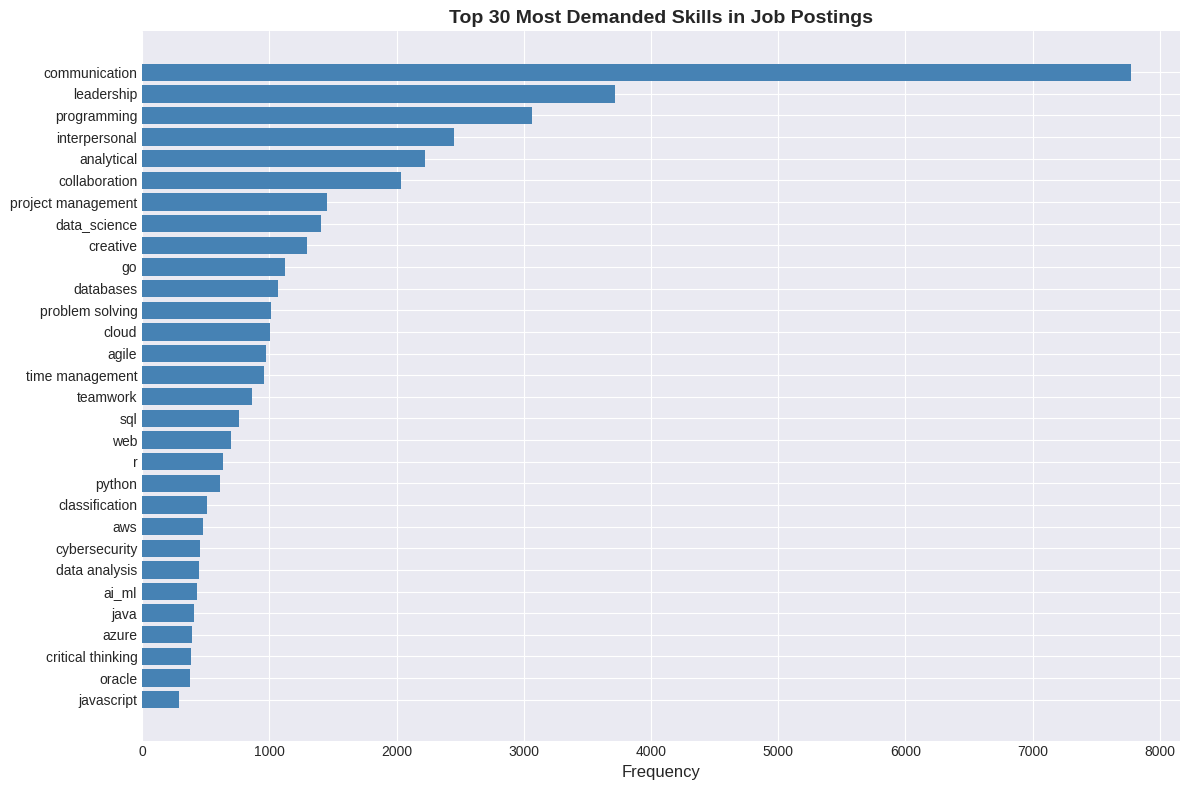

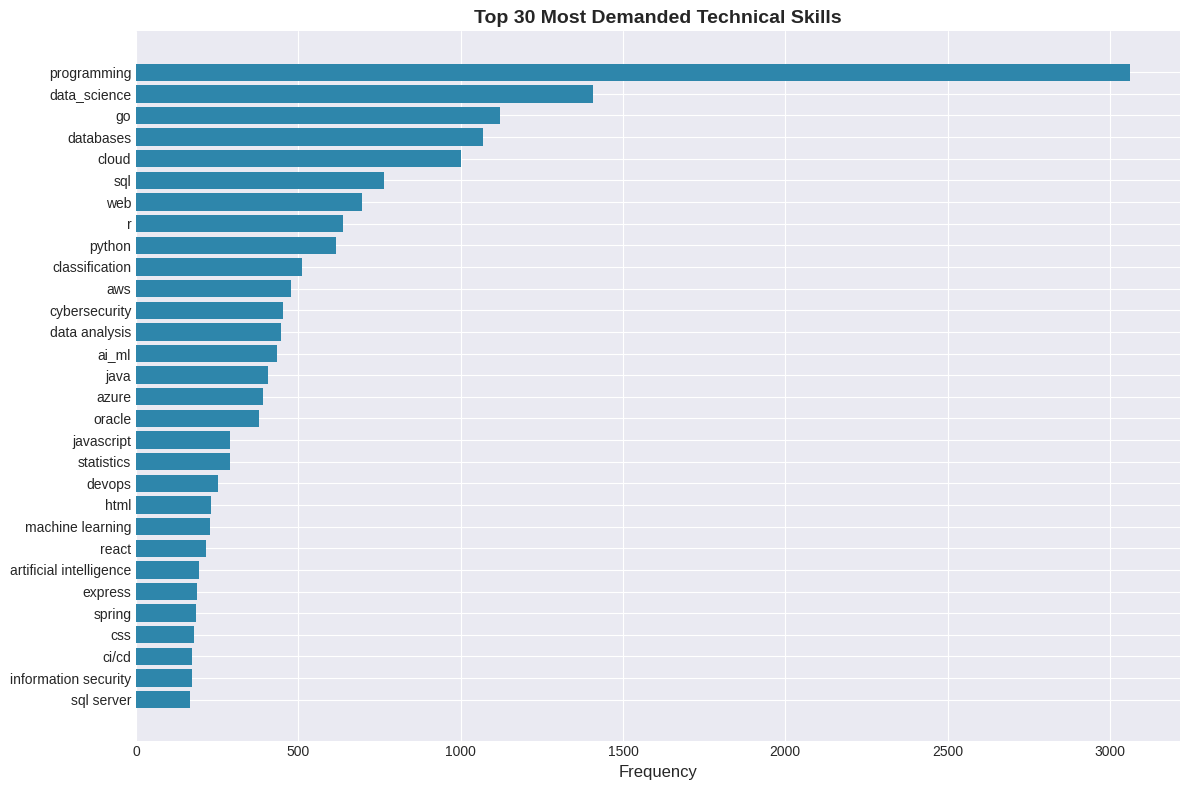

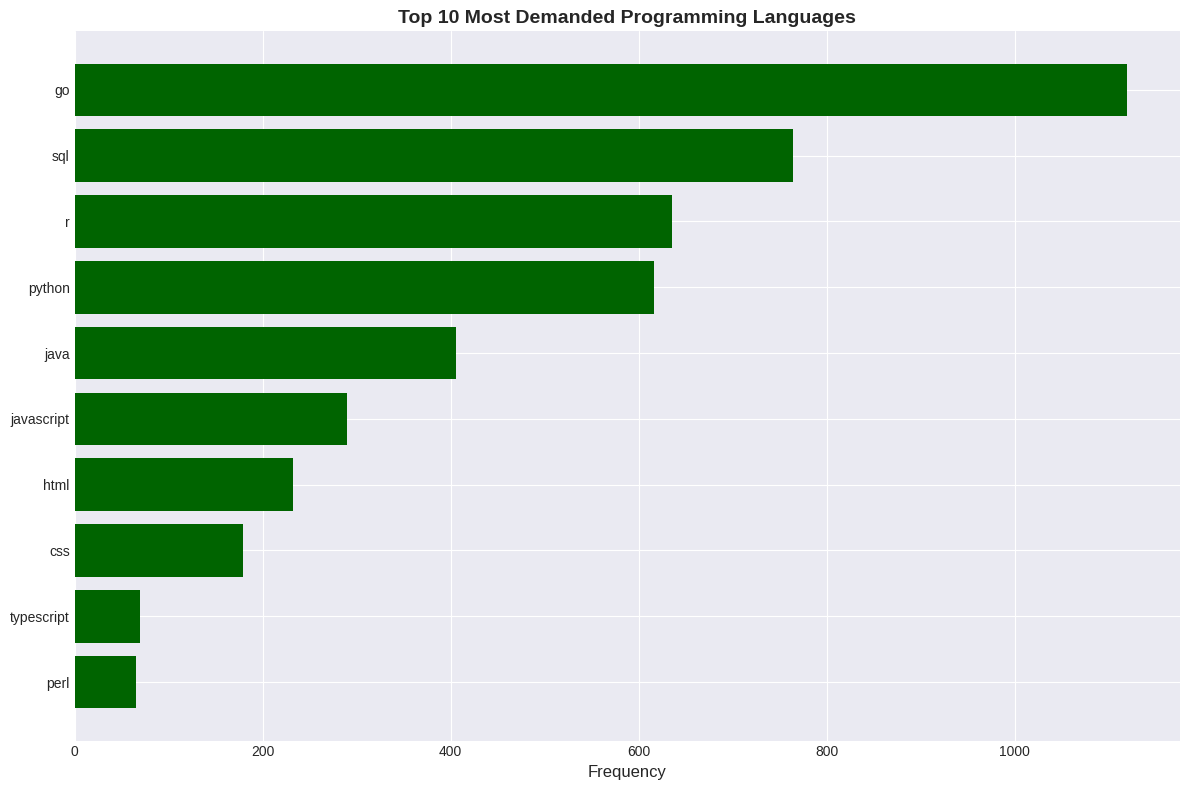

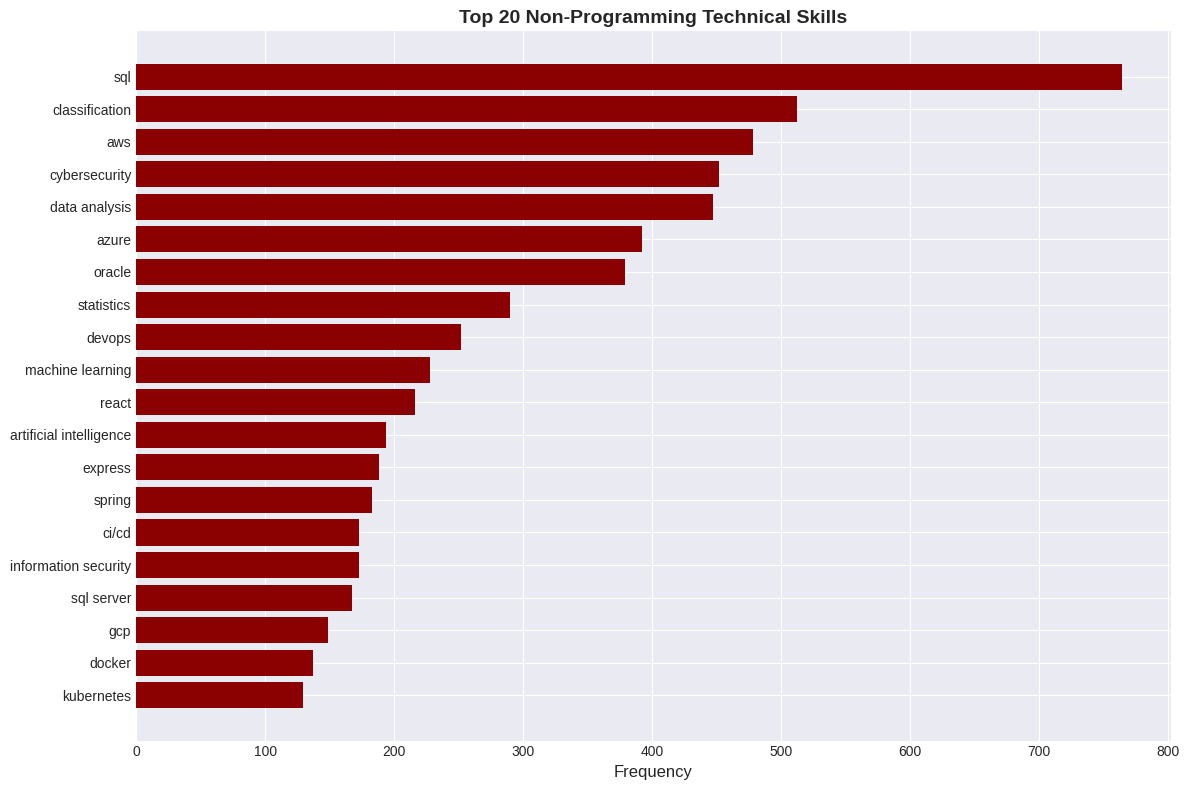

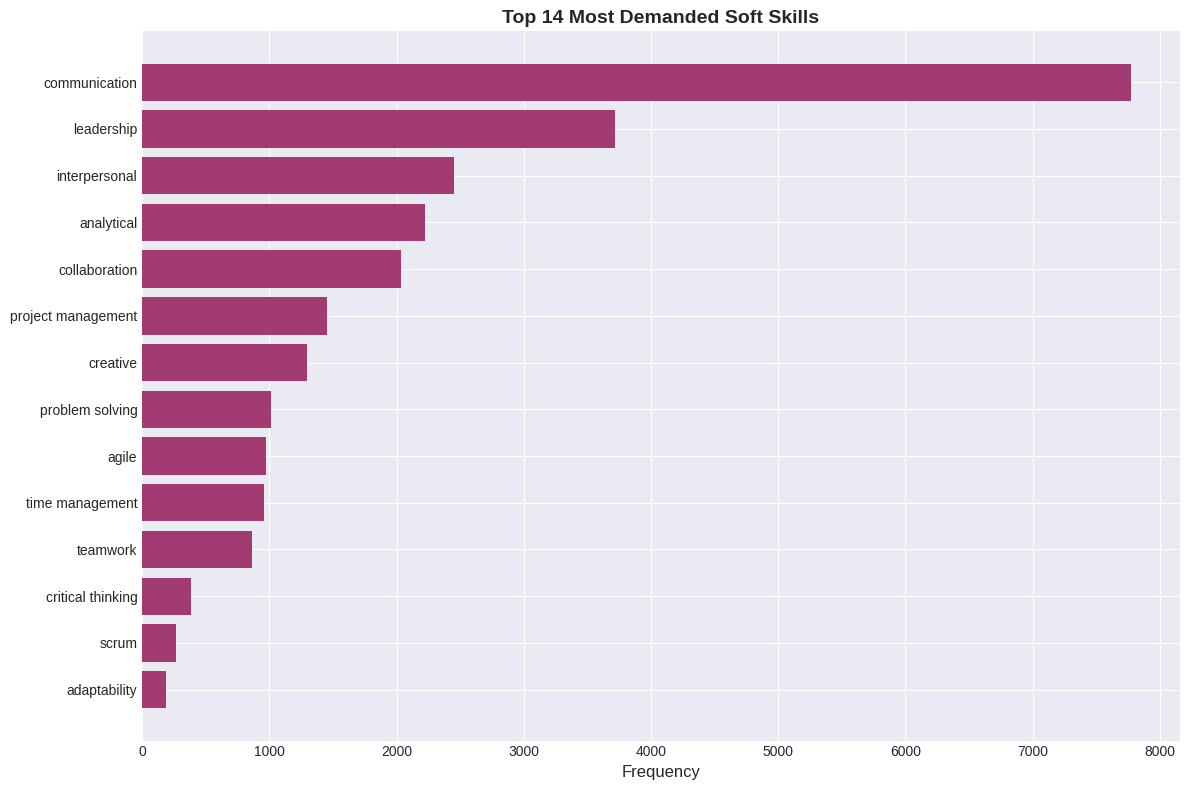

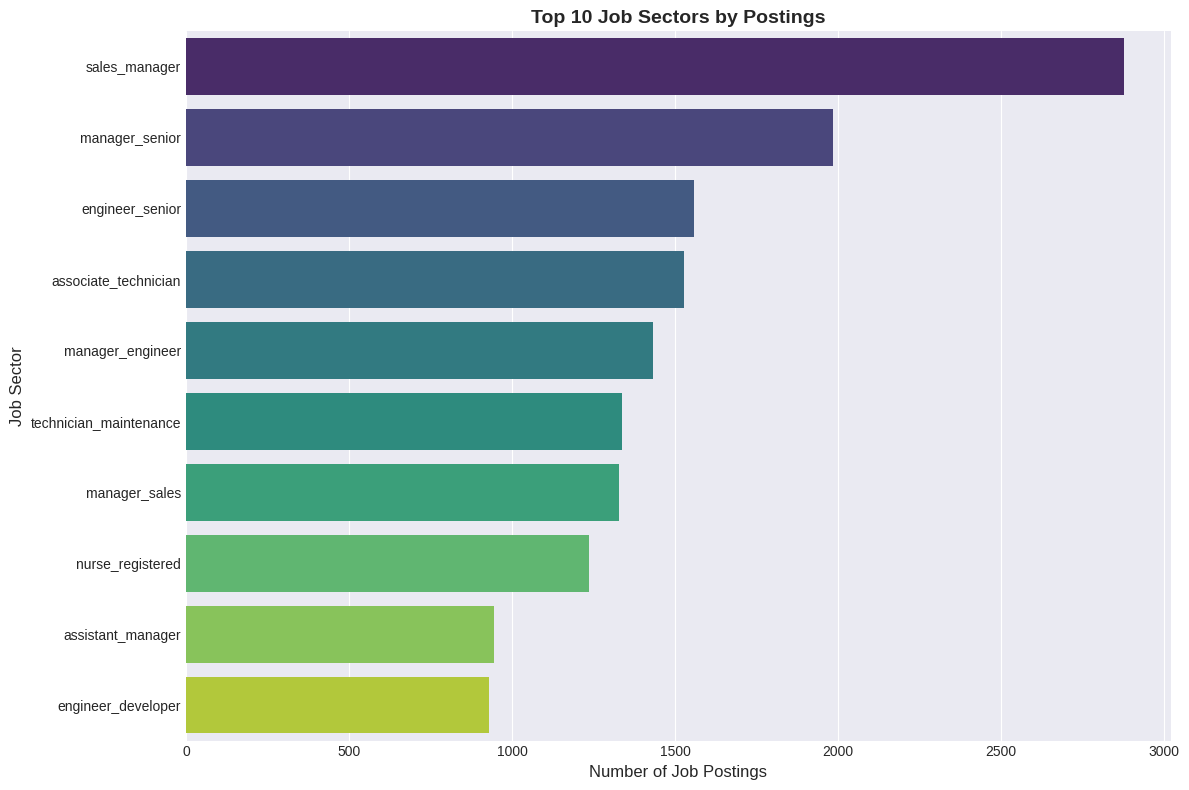

In [11]:
def main():
    """Main execution function."""
    print("=" * 80)
    print("JOB MARKET SKILLS ANALYZER")
    print("=" * 80)
    print("\nThis tool analyzes job postings to identify trending skills")
    print("and provides data-driven insights for career planning.\n")

    # Define the filename for the job postings CSV
    filename = '/content/job_postings.csv'  # This was the missing definition

    # Initialize analyzer
    analyzer = JobSkillsAnalyzer(filename)  # Use the uploaded filename

    # Load data (use sample_size=None for full dataset, or specify a number for faster testing)
    print("\n[Step 1/6] Loading data...")
    sample_size = None  # Set to 10000 for faster testing
    if not analyzer.load_data(sample_size=sample_size):
        return None

    # Analyze skills
    print("\n[Step 2/6] Extracting skills...")
    analyzer.analyze_skills()

    # Train Word2Vec model
    print("\n[Step 3/6] Training Word2Vec model...")
    analyzer.train_word2vec(vector_size=100, window=5, min_count=2, epochs=10)

    # Cluster by sector (uses Word2Vec if available, otherwise TF-IDF)
    print("\n[Step 4/6] Clustering by sector")
    analyzer.cluster_by_sector(n_clusters=12, use_word2vec=True)

    # Generate visualizations
    print("\n[Step 5/6] Creating visualizations...")
    analyzer.visualize_top_skills(top_n=30, save_path='top_skills.png')


    # Generate report
    print("\n[Step 6/6] Generating insights report...")
    report = analyzer.generate_insights_report('skills_insights_report.txt')

    print("\n" + "=" * 80)
    print("ANALYSIS COMPLETE!")
    print("=" * 80)
    print("\nGenerated files:")
    print("  - top_skills.png: Bar chart of top skills (all)")
    print("  - top_technical_skills.png: Bar chart of top technical/hard skills")
    print("  - top_programming_languages.png: Bar chart of top programming languages")
    print("  - top_non_programming_tech_skills.png: Bar chart of top technical skills (excluding programming)")
    print("  - top_soft_skills.png: Bar chart of top soft skills")
    print("  - skill_trends.png: Line chart of skill trends over time")
    print("  - top_sectors_job_count.png: Bar chart of top sectors by job count")
    print("  - wordcloud_skills.png: Word cloud of all skills")
    print("  - wordcloud_technical_skills.png: Word cloud of technical skills")
    print("  - wordcloud_soft_skills.png: Word cloud of soft skills")
    print("  - skills_insights_report.txt: Detailed text report")
    print("\n" + "=" * 80)

    return analyzer # Return the analyzer object

# Run the main function and store the result in a global variable
if __name__ == "__main__":
    analyzer = main() # Assign the returned analyzer object to a global variable named 'analyzer'


In [ ]:
analyzer.visualize_top_technical_skills(top_n=30, save_path='top_technical_skills.png')


In [ ]:
analyzer.visualize_top_programming_languages(top_n=10, save_path='top_programming_languages.png')


In [ ]:
analyzer.visualize_top_non_programming_tech_skills(top_n=20, save_path='top_non_programming_tech_skills.png')
analyzer.visualize_top_soft_skills(top_n=30, save_path='top_soft_skills.png')

In [ ]:
analyzer.visualize_skill_trends(top_n=10, save_path='skill_trends.png')
analyzer.visualize_top_sectors_by_job_count(top_n=10, save_path='top_sectors_job_count.png')


In [ ]:
analyzer.visualize_wordcloud(top_n=50, save_path='wordcloud_skills.png')
analyzer.visualize_wordcloud_technical(top_n=50, save_path='wordcloud_technical_skills.png')
analyzer.visualize_wordcloud_soft(top_n=50, save_path='wordcloud_soft_skills.png')

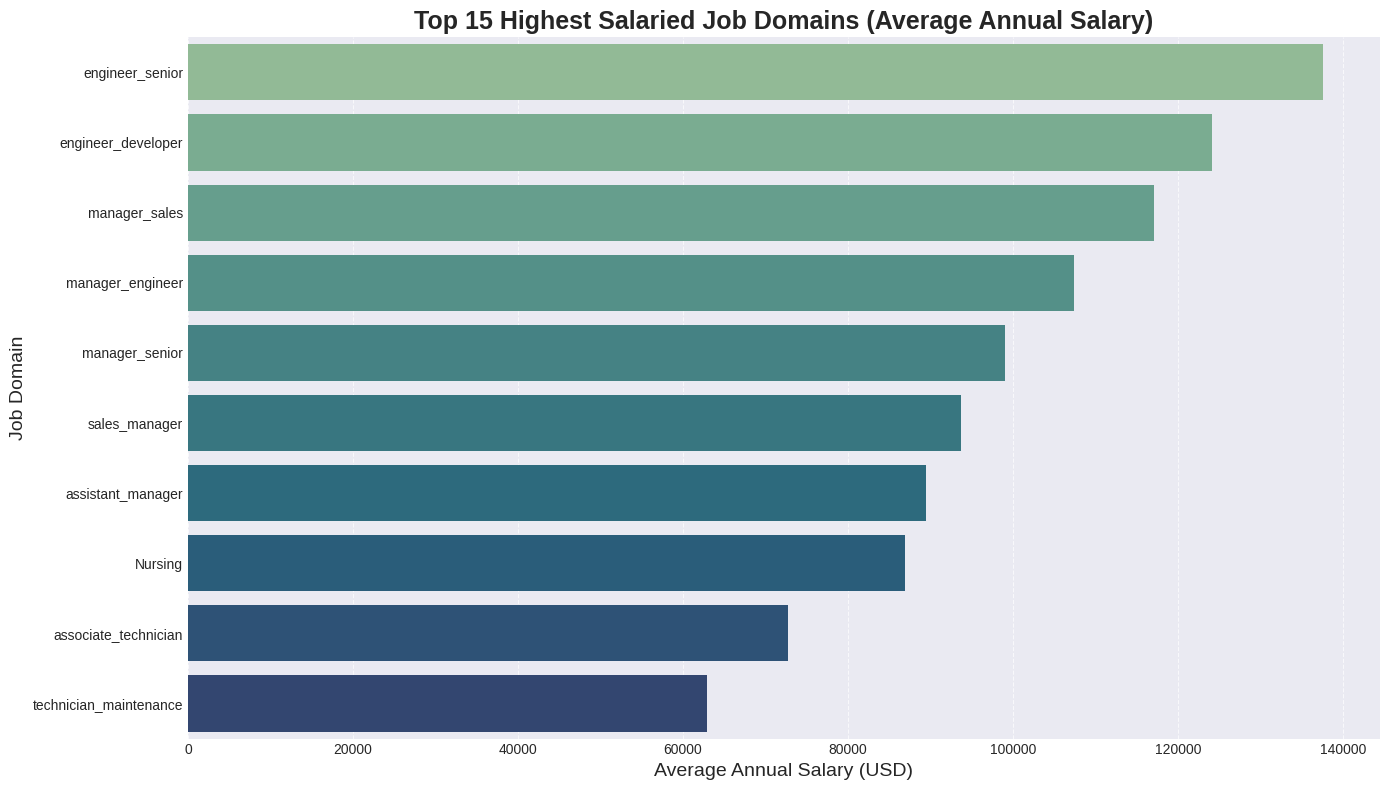

Saved visualization to highest_salaried_domains.png

Top Highest Salaried Job Domains:
sector_name
engineer_senior           137615.477658
engineer_developer        124155.075785
manager_sales             117097.029370
manager_engineer          107418.457950
manager_senior             99069.210050
sales_manager              93653.589348
assistant_manager          89440.707022
Nursing                    86880.093517
associate_technician       72682.642750
technician_maintenance     62977.970600
Name: annual_salary_estimate, dtype: float64


In [12]:

import seaborn as sns

# Ensure analyzer and its df are available from the previous run
if 'analyzer' not in globals() or analyzer is None:
    print("Analyzer object not found. Please run the main analysis function first.")
else:
    df_salary = analyzer.df.copy()

    # Calculate an aggregated salary for each job posting
    # Prioritize max_salary, then min_salary, then average if both exist
    df_salary['base_salary'] = df_salary['max_salary'].fillna(df_salary['min_salary'])
    df_salary['base_salary'] = df_salary.apply(lambda row: (row['min_salary'] + row['max_salary']) / 2
                                               if pd.notna(row['min_salary']) and pd.notna(row['max_salary'])
                                               else row['base_salary'], axis=1)

    # Convert all salaries to yearly equivalent
    df_salary['annual_salary_estimate'] = df_salary['base_salary']

    # Handle different pay periods and convert to annual equivalent
    # Average working hours per year: 40 hours/week * 52 weeks/year = 2080 hours
    # Average working days per year: 5 days/week * 52 weeks/year = 260 days
    df_salary.loc[df_salary['pay_period'] == 'HOURLY', 'annual_salary_estimate'] = df_salary['base_salary'] * 2080
    df_salary.loc[df_salary['pay_period'] == 'WEEKLY', 'annual_salary_estimate'] = df_salary['base_salary'] * 52
    df_salary.loc[df_salary['pay_period'] == 'MONTHLY', 'annual_salary_estimate'] = df_salary['base_salary'] * 12
    # 'YEARLY' pay period is already correctly scaled by 'base_salary'

    # Filter out entries where annual_salary_estimate is NaN or unrealistically low/high
    # Considering typical salary ranges to filter out noise from wrong conversions or data entry errors
    df_filtered_salaries = df_salary[
        (df_salary['annual_salary_estimate'].notna()) &
        (df_salary['annual_salary_estimate'] > 20000) &  # Minimum plausible annual salary
        (df_salary['annual_salary_estimate'] < 1000000)   # Maximum plausible annual salary
    ].copy()

    # Ensure sector_name exists and is not NaN
    df_filtered_salaries = df_filtered_salaries.dropna(subset=['sector_name', 'annual_salary_estimate'])

    if not df_filtered_salaries.empty:
        # REMOVE DUPLICATES / MERGE SIMILAR SECTORS
        # Combine 'engineer_manager' and 'manager_engineer' into 'Engineering_Management'
        df_filtered_salaries.loc[df_filtered_salaries['sector_name'].isin(['Engineer manager', 'Manager Engineer']), 'sector_name'] = 'Engineering_Management'
        # Combine 'nurse_registered' and 'travel_nurse' into 'Nursing'
        df_filtered_salaries.loc[df_filtered_salaries['sector_name'].isin(['nurse_registered', 'travel_nurse']), 'sector_name'] = 'Nursing'

        # Group by sector and calculate average annual salary
        sector_average_salaries = df_filtered_salaries.groupby('sector_name')['annual_salary_estimate'].mean().sort_values(ascending=False)

        # Visualize the top N highest salaried domains
        top_n = 15 # Display top 15 sectors
        plt.figure(figsize=(14, 8))
        sns.barplot(x=sector_average_salaries.head(top_n).values,
                    y=sector_average_salaries.head(top_n).index,
                    palette='crest') # A nice sequential palette
        plt.title(f'Top {top_n} Highest Salaried Job Domains (Average Annual Salary)', fontsize=18, fontweight='bold')
        plt.xlabel('Average Annual Salary (USD)', fontsize=14)
        plt.ylabel('Job Domain', fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('highest_salaried_domains.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("Saved visualization to highest_salaried_domains.png")

        # Display the top salaried domains
        print("\nTop Highest Salaried Job Domains:")
        print(sector_average_salaries.head(top_n))
    else:
        print("No sufficient data found to visualize highest salaried domains after filtering for valid salaries and sectors.")


## SWOT and PESTEL Analysis

**SWOT Analysis (Strengths, Weaknesses, Opportunities, Threats):**

*   **Strengths:** Our analysis of trending technical and soft skills (from `top_technical_skills.png`, `top_soft_skills.png`, `wordcloud_technical_skills.png`, `wordcloud_soft_skills.png`) highlights the core competencies demanded by the job market. These can be considered the strengths of the current workforce or education systems if they align well with these demands. For businesses, identifying in-demand skills can inform recruitment strategies.
*   **Weaknesses:** Skills that are decreasing in demand (if trend data were fully available from `skill_trends.png`) or those that are less frequent could point to weaknesses in the workforce's current skill set or gaps in training programs. This could also identify areas where companies struggle to find talent.
*   **Opportunities:** The insights report (`skills_insights_report.txt`) and sector analysis (`sector_skills.png`, `highest_salaried_domains.png`) can reveal emerging skill demands or high-paying sectors. These represent opportunities for individuals to upskill, for educators to develop new curricula, and for businesses to invest in growing markets.
*   **Threats:** A decline in demand for certain skills, or the rise of new technologies making existing skills obsolete, poses a threat. Competition from other regions or educational institutions that are better aligned with market demands could also be a threat.

**PESTEL Analysis (Political, Economic, Social, Technological, Environmental, Legal):**

*   **Political:** Government policies on education, immigration (affecting talent pools), or industry regulations could influence skill demand. While not directly visible in our output, the identified skills are a consequence of these policies.
*   **Economic:** The average salaries by domain (`highest_salaried_domains.png`) directly reflect economic conditions and demand. High-paying sectors indicate strong economic activity and investment in those areas. Overall job posting volume (from the insights report) can also hint at economic health.
*   **Social:** The demand for soft skills (`top_soft_skills.png`, `wordcloud_soft_skills.png`) reflects societal expectations and changing work cultures (e.g., emphasis on teamwork, communication). Demographic shifts and educational trends also influence the available talent pool, which in turn impacts skill demand.
*   **Technological:** The strong presence of programming languages, data science, cloud, and AI/ML skills (`top_technical_skills.png`, `wordcloud_technical_skills.png`) directly points to the profound impact of technological advancements. Emerging technologies drive demand for new skills and can make others obsolete.
*   **Environmental:** While less directly captured by skill data, a shift towards green technologies or sustainable practices could influence demand for related engineering, science, or policy skills. This would likely appear as new technical skills in job descriptions.
*   **Legal:** Labor laws, data privacy regulations (e.g., GDPR), and professional certifications can influence the types of skills required (e.g., cybersecurity compliance, legal tech skills). These indirect influences shape the job descriptions from which skills are extracted.

By systematically evaluating these factors in conjunction with the data outputs, you can gain a comprehensive understanding of the current job market landscape and its implications for various stakeholders.